In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

In [6]:
absolute_path = os.path.abspath(os.path.dirname('Open_Parking_and_Camera_Violations.csv'))
absolute_path

'C:\\Users\\junya\\Documents\\GitHub\\Project_1\\NY Red Light Violation'

In [8]:
# datapath = "Users/junya/NU-CHI-DATA-PT-11-2019-U-C/Homework/NY Red Light/Resources/Open_Parking_and_Camera_Violations.csv"
data_file = pd.read_csv('C:\\Users\\junya\\Documents\\GitHub\\Project_1\\NY Red Light Violation\\Resources\\Open_Parking_and_Camera_Violations.csv')
data_file.head(5)

FileNotFoundError: [Errno 2] File b'C:\\Users\\junya\\Documents\\GitHub\\Project_1\\NY Red Light Violation\\Resources\\Open_Parking_and_Camera_Violations.csv' does not exist: b'C:\\Users\\junya\\Documents\\GitHub\\Project_1\\NY Red Light Violation\\Resources\\Open_Parking_and_Camera_Violations.csv'

In [5]:
# get rid of useless columns
cleaned_df = data_file.drop(["Judgment Entry Date",
                             "Penalty Amount",
                             "Interest Amount",
                             "Reduction Amount",
                             "Payment Amount",
                             "Amount Due",
                             "Issuing Agency",
                             "Violation Status",
                             "Summons Image",
                             "Summons Number",
                             "Precinct"
                            ], axis=1)
cleaned_df.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County
0,JAM2822,NY,PAS,11/25/2019,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK
1,HLE9655,NY,PAS,11/24/2019,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN
2,HXF9873,NY,PAS,11/24/2019,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN
3,AU374Z,NJ,PAS,11/24/2019,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK
4,HSF4039,NY,PAS,11/24/2019,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX


In [4]:
cleaned_df.count()

Plate             1950422
State             1950422
License Type      1950422
Issue Date        1950422
Violation Time    1950422
Violation         1950422
Fine Amount       1950422
County            1743892
dtype: int64

In [7]:
cleaned_df_new = cleaned_df.dropna(axis = 0, how ='any')
cleaned_df_new = cleaned_df_new.reset_index(drop=True)
cleaned_df_new.count()
# cleaned_df_new

Plate             1743892
State             1743892
License Type      1743892
Issue Date        1743892
Violation Time    1743892
Violation         1743892
Fine Amount       1743892
County            1743892
dtype: int64

1. Do warmer temp increase the number of red light/speed violations

In [ ]:
# how to define the warmer temp? divide by seasons or we will check the real-time temp
# set bins for temp and the count the number of violation?
# need to get the temp info of NY
# 5 years data
# Groupby by date

In [8]:
date_modified = pd.to_datetime(cleaned_df_new["Issue Date"])
cleaned_df_new["Issue Date"] = date_modified
cleaned_df_new.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County
0,JAM2822,NY,PAS,2019-11-25,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK
1,HLE9655,NY,PAS,2019-11-24,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN
2,HXF9873,NY,PAS,2019-11-24,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN
3,AU374Z,NJ,PAS,2019-11-24,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK
4,HSF4039,NY,PAS,2019-11-24,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX


In [9]:
violation_groupby_date = cleaned_df_new.groupby("Issue Date")
violation_count_by_date = violation_groupby_date.count()
violation_count_by_date.head()

,Plate,State,License Type,Violation Time,Violation,Fine Amount,County
Issue Date,,,,,,,
2015-08-01,1,1,1,1,1,1,1
2016-01-20,1,1,1,1,1,1,1
2016-02-29,1,1,1,1,1,1,1
2016-04-24,2,2,2,2,2,2,2
2016-04-26,1,1,1,1,1,1,1


In [10]:
violation_count_by_date_2 = violation_count_by_date[["State"]]
violation_count_by_date_2 

,State
Issue Date,
2015-08-01,1
2016-01-20,1
2016-02-29,1
2016-04-24,2
2016-04-26,1
...,...
2019-11-25,942
2019-11-26,1064
2019-11-27,554


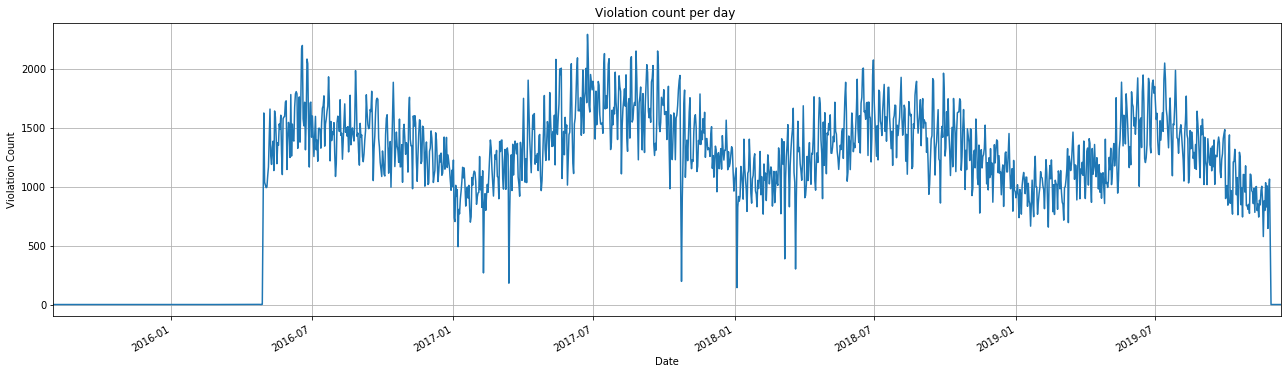

In [11]:
violation_count_by_date_2.plot(kind="line", figsize=(22,6), legend=False)

# set labels and sticks
plt.style.use('seaborn-bright')
plt.title(f"Violation count per day ")
plt.ylabel("Violation Count")
plt.xlabel("Date")
plt.grid(True)
# plt.xlim([])
plt.ylim([violation_count_by_date["Plate"].min() - 100, violation_count_by_date["Plate"].max() + 100])

# Show plot
plt.show()

In [12]:
cleaned_df_new_2 = cleaned_df_new.copy()
cleaned_df_new_2["Month"] = pd.DatetimeIndex(cleaned_df_new['Issue Date']).month
cleaned_df_new_2["Year"] = pd.DatetimeIndex(cleaned_df_new['Issue Date']).year
cleaned_df_new_2["Year_Month"] = pd.to_datetime(cleaned_df_new['Issue Date']).dt.to_period('M')
cleaned_df_new_2.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County,Month,Year,Year_Month
0,JAM2822,NY,PAS,2019-11-25,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK,11,2019,2019-11
1,HLE9655,NY,PAS,2019-11-24,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN,11,2019,2019-11
2,HXF9873,NY,PAS,2019-11-24,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN,11,2019,2019-11
3,AU374Z,NJ,PAS,2019-11-24,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK,11,2019,2019-11
4,HSF4039,NY,PAS,2019-11-24,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX,11,2019,2019-11


In [14]:
violation_month_year = cleaned_df_new_2.groupby("Year_Month")
violation_month_year_count = violation_month_year.count()
# violation_month_year_count

In [15]:
violation_month_year_count_2 = violation_month_year_count[['Plate']]
# violation_month_year_count_2 

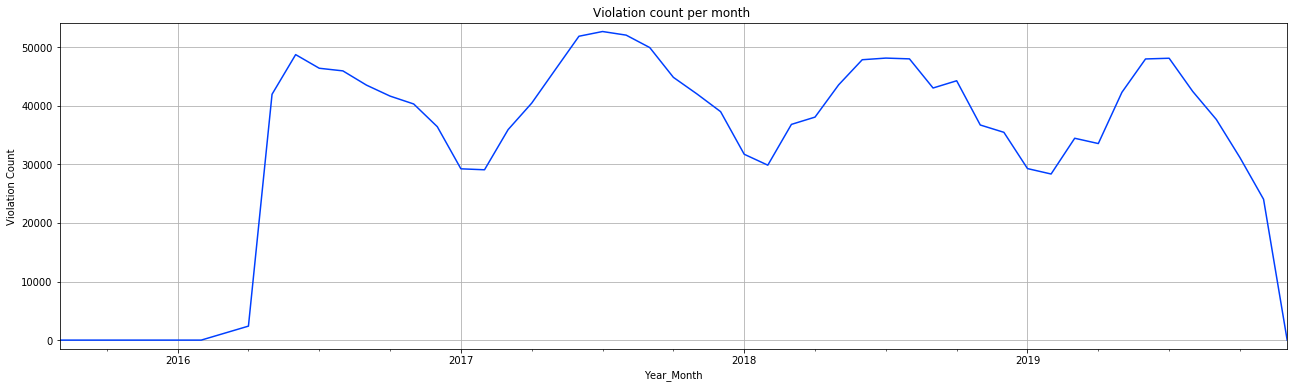

In [18]:
#violation_month_year_count_2.plot(kind="bar", figsize=(22,6), legend=False)
violation_month_year_count_2.plot(kind="line", figsize=(22,6), legend=False)
# set labels and sticks
plt.style.use('seaborn-bright')
plt.title(f"Violation count per month ")
plt.ylabel("Violation Count")
plt.xlabel("Year_Month")
plt.grid(True)
# plt.xlim([])
plt.ylim([violation_month_year_count["Plate"].min() - 1500, violation_month_year_count["Plate"].max() + 1500])

# Show plot
plt.show()

In [21]:
cleaned_df_new_3 = cleaned_df_new.copy()
cleaned_df_new_3.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County
0,JAM2822,NY,PAS,2019-11-25,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK
1,HLE9655,NY,PAS,2019-11-24,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN
2,HXF9873,NY,PAS,2019-11-24,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN
3,AU374Z,NJ,PAS,2019-11-24,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK
4,HSF4039,NY,PAS,2019-11-24,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX


In [22]:
# Function to convert the date format 
def convert24(str1): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if str1[-1] == "A" and str1[:2] == "12": 
        return "00" + str1[2:-1] 
          
    # remove the AM     
    elif str1[-1] == "A": 
        return str1[:-1] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif str1[-1] == "P" and str1[:2] == "12": 
        return str1[:-1] 
          
    else: 
          
        # add 12 to hours and remove PM 
        return str(int(str1[:2]) + 12) + str1[2:5] 

cleaned_df_new_3['Modified Time'] = [convert24(x) for x in cleaned_df_new_3['Violation Time']]
cleaned_df_new_3.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County,Modified Time
0,JAM2822,NY,PAS,2019-11-25,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK,07:52
1,HLE9655,NY,PAS,2019-11-24,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN,21:44
2,HXF9873,NY,PAS,2019-11-24,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN,20:22
3,AU374Z,NJ,PAS,2019-11-24,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK,19:53
4,HSF4039,NY,PAS,2019-11-24,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX,19:00


In [31]:
# extract the hour
cleaned_df_new_3["Hour"] = [x[:2] for x in cleaned_df_new_3['Modified Time']]
cleaned_df_new_3.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,County,Modified Time,Hour
0,JAM2822,NY,PAS,2019-11-25,07:52A,FAILURE TO STOP AT RED LIGHT,50.0,BK,07:52,07
1,HLE9655,NY,PAS,2019-11-24,09:44P,FAILURE TO STOP AT RED LIGHT,50.0,QN,21:44,21
2,HXF9873,NY,PAS,2019-11-24,08:22P,FAILURE TO STOP AT RED LIGHT,50.0,MN,20:22,20
3,AU374Z,NJ,PAS,2019-11-24,07:53P,FAILURE TO STOP AT RED LIGHT,50.0,BK,19:53,19
4,HSF4039,NY,PAS,2019-11-24,07:00P,FAILURE TO STOP AT RED LIGHT,50.0,BX,19:00,19


In [35]:
violation_by_hour = cleaned_df_new_3.groupby("Hour").count()
violation_by_hour = violation_by_hour[["Plate"]]
violation_by_hour

,Plate
Hour,
00,32800
01,23661
02,14647
03,15330
04,16897
05,23591
06,45017
07,64947
08,80223


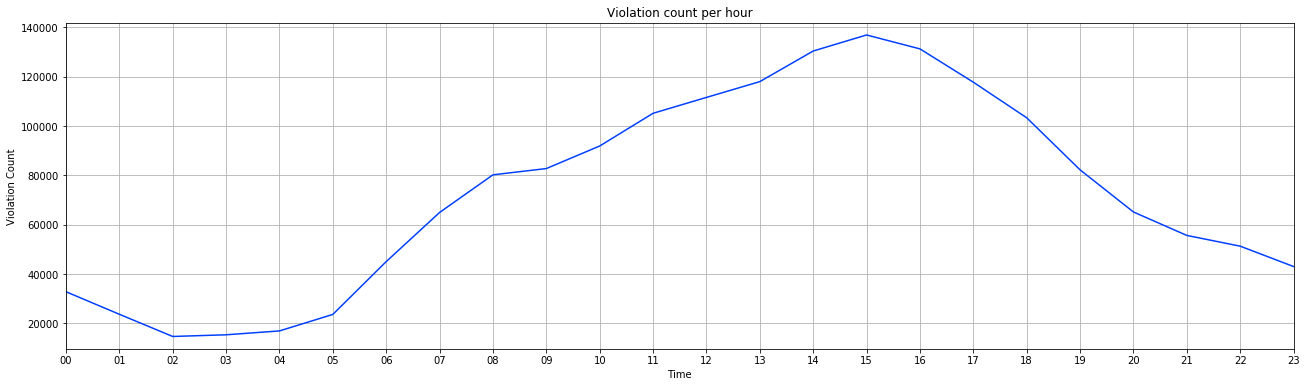

In [80]:
violation_by_hour.plot(kind="line", figsize=(22,6), legend=False)
# set labels and sticks
tick_locations = range(0, 24)
plt.xticks(tick_locations, violation_by_hour.index)
plt.style.use('seaborn-bright')
plt.title(f"Violation count per hour")
plt.ylabel("Violation Count")
plt.xlabel("Time")
plt.grid(True)
# plt.xlim([])
plt.ylim([violation_by_hour["Plate"].min() - 5000, violation_by_hour["Plate"].max() + 5000])

# Show plot
plt.show()

2. Do specific areas (could be communities) have a higher frequencies of red light/speed violations

In [ ]:
# 3. In which season are red light/speed violations more common across the U.S. (compare between major cities)